In [3]:
!pip install qiskit
!pip install pennylane
!pip install strawberryfields
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 18.1 MB/s eta 0:00:00
  Using cached StrawberryFields-0.23.0-py3-none-any.whl (4.9 MB)
  Using cached quantum_blackbird-0.5.0-py3-none-any.whl (48 kB)
  Using cached thewalrus-0.20.0.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  Using cached quantum_xir-0.2.2-py3-none-any.whl (27 kB)
  Using cached xanadu_cloud_client-0.3.1-py3-none-any.whl (25 kB)
  Using cached antlr4-python3-runtime-4.9.2.tar.gz (117 kB)
  Preparing metadata (setup.py) ... done
  Using cached lark_parser-0.12.0-py2.py3-none-any.whl (103 kB)
  Using

Estimating E_2 via IQPE algorithm 
E_2 = 5.288538324467086
Eigenvalue of the Hamiltonian: 5.288538324467086
Estimated eigenvalue of the Hamiltonian: 5.289165756629691


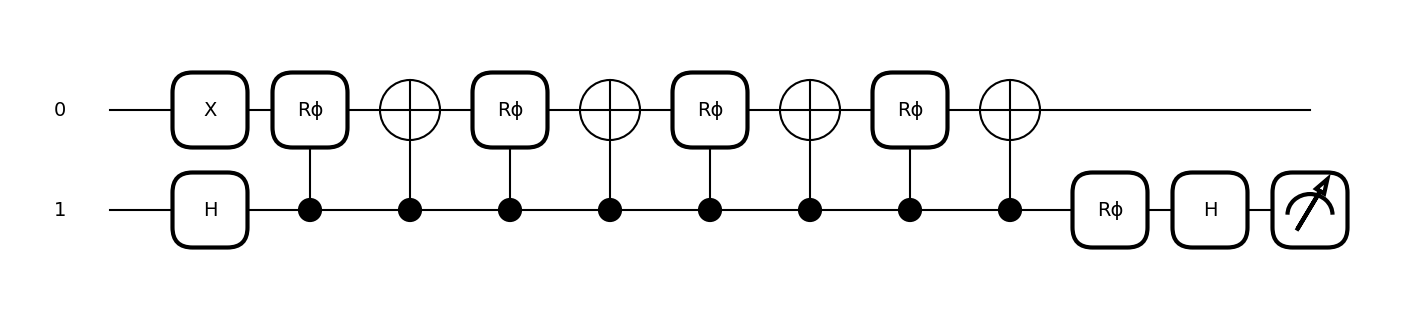

In [5]:
import pennylane as qml
import numpy as np
from numpy.random import random

# Backend specification
dev = qml.device('default.qubit', wires=2)

# Define the unitary operation
def unitary(E_2, E_1, t, wires):
    qml.PhaseShift(E_2 * t, wires=wires[0])
    qml.PauliX(wires=wires[0])
    qml.PhaseShift(E_1 * t, wires=wires[0])
    qml.PauliX(wires=wires[0])

# Quantum function for the circuit
@qml.qnode(dev)
def circuit(E_2, E_1, t, k_precision, phase):
    # (1) |1> eigenstate initialization
    qml.PauliX(wires=0)

    # (2) Initial Hadamard gate on ancillary qubit
    qml.Hadamard(wires=1)

    # (3) Apply controlled-unitary
    for _ in range(2 ** k_precision):
        qml.ctrl(unitary, control=1)(E_2, E_1, t, [0, 1])

    # (4) Phase shift and final Hadamard gate
    qml.PhaseShift(-2 * np.pi * phase * 2 ** k_precision, wires=1)
    qml.Hadamard(wires=1)

    # (5) Measurement
    return qml.probs(wires=1)

# Parameters and phase estimation loop
E_1, E_2 = (2 * np.pi * random(), 2 * np.pi * random())
print("Estimating E_2 via IQPE algorithm \nE_2 =", E_2)

t = 1
num_bits_estimate = 10
phase = 0
for k_precision in reversed(range(num_bits_estimate)):
    # Execution
    probs = circuit(E_2, E_1, t, k_precision, phase)
    if k_precision == 1:
      fig, ax = qml.draw_mpl(circuit)(E_2, E_1, t, k_precision, phase)
      fig.show()
    value = np.argmax(probs)  # Get the most probable state

    # Update phase
    phase += value / 2 ** (k_precision + 1)

eigenvalue = 2 * np.pi * phase / t
print("Eigenvalue of the Hamiltonian:", E_2)
print("Estimated eigenvalue of the Hamiltonian:", eigenvalue)


Actual Eigenvalue:  0.33617238783875486
Iteration 	 Estimated Eigenvalue 	 True Error(%)
1 	 0.0 	 100.0
2 	 0.0 	 100.0
3 	 0.0 	 100.0
4 	 0.39269908169872414 	 16.81479380962196
5 	 0.39269908169872414 	 16.81479380962196
6 	 0.2945243112740431 	 12.38890464278353
7 	 0.3436116964863836 	 2.212944583419215
8 	 0.3436116964863836 	 2.212944583419215
9 	 0.3313398501832985 	 1.4375177231314753
10 	 0.3374757733348411 	 0.38771343014387816
11 	 0.3374757733348411 	 0.38771343014387816
12 	 0.33594179254695544 	 0.0685943581749561


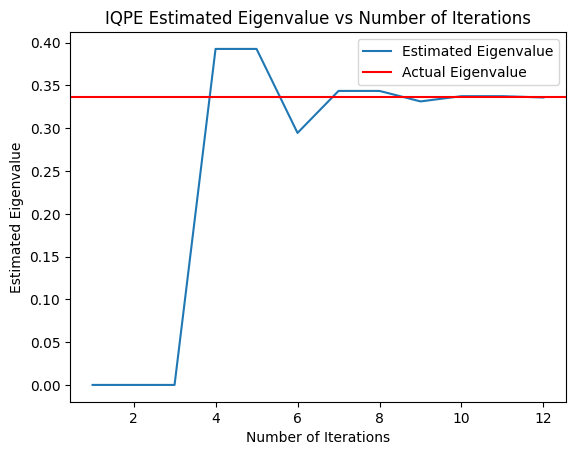

In [6]:
import pennylane as qml
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt

# Backend specification
dev = qml.device('default.qubit', wires=2)

# Define the unitary operation
def unitary(E_2, E_1, t, wires):
    qml.PhaseShift(E_2 * t, wires=wires[0])
    qml.PauliX(wires=wires[0])
    qml.PhaseShift(E_1 * t, wires=wires[0])
    qml.PauliX(wires=wires[0])

# Quantum function for the circuit
@qml.qnode(dev)
def circuit(E_2, E_1, t, k_precision, phase):
    # (1) |1> eigenstate initialization
    qml.PauliX(wires=0)

    # (2) Initial Hadamard gate on ancillary qubit
    qml.Hadamard(wires=1)

    # (3) Apply controlled-unitary
    for _ in range(2 ** k_precision):
        qml.ctrl(unitary, control=1)(E_2, E_1, t, [0, 1])

    # (4) Phase shift and final Hadamard gate
    qml.PhaseShift(-2 * np.pi * phase * 2 ** k_precision, wires=1)
    qml.Hadamard(wires=1)

    # (5) Measurement
    return qml.probs(wires=1)

# Parameters
E_1, E_2 = (2 * np.pi * random(), 2 * np.pi * random())
t = 1
num_bits_estimate = 12

# Store estimated eigenvalues
estimated_eigenvalues = []
print("Actual Eigenvalue: ", E_2)
print("Iteration \t Estimated Eigenvalue \t True Error(%)")
# Perform IQPE for an increasing number of iterations
for num_iterations in range(1, num_bits_estimate + 1):
    phase = 0
    for k_precision in reversed(range(num_iterations)):
        probs = circuit(E_2, E_1, t, k_precision, phase)
        value = np.argmax(probs)
        phase += value / 2 ** (k_precision + 1)
    estimated_eigenvalue = 2 * np.pi * phase / t
    print(num_iterations, "\t", estimated_eigenvalue, "\t", np.abs((E_2 - estimated_eigenvalue)/E_2)*100)
    estimated_eigenvalues.append(estimated_eigenvalue)

# Plotting
plt.plot(range(1, num_bits_estimate + 1), estimated_eigenvalues, label='Estimated Eigenvalue')
plt.axhline(y=E_2, color='r', linestyle='-', label='Actual Eigenvalue')
plt.xlabel('Number of Iterations')
plt.ylabel('Estimated Eigenvalue')
plt.title('IQPE Estimated Eigenvalue vs Number of Iterations')
plt.legend()
plt.show()
